In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('Bostandyk district.csv')
df

,Year,Population,District Population,Migration,Birth,Death
0,2000,1 130 439,238 631,NaN,NaN,NaN
1,2001,1 128 759,239 777,NaN,NaN,NaN
2,2002,1 132 424,242 605,NaN,NaN,NaN
3,2003,1 149 641,248 362,-43,"4,055","2,279"
4,2004,1 175 208,255 677,-59,"5,409","2,337"
5,2005,1 209 485,266 160,277,"6,209","2,355"
6,2006,1 247 896,276 427,128,"6,528","2,056"
7,2007,1 287 246,285 574,-340,"5,825","2,119"
8,2008,1 324 739,291 661,-116,"6,858","2,047"
9,2009,1 361 877,266 421,-139,"3,798","1,791"


In [5]:
df = df.dropna()
df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
df['Migration'] = df['Migration'].astype(str).str.replace(',', '.').astype(float)
df['Birth'] = df['Birth'].astype(str).str.replace(',', '.').astype(float)
df['Death'] = df['Death'].astype(str).str.replace(',', '.').astype(float)


df

/tmp/ipykernel_5786/3540928809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_5786/3540928809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_5786/3540928809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Year,Population,District Population,Migration,Birth,Death
3,2003,1149641,248362,-43.000,4.055,2.279
4,2004,1175208,255677,-59.000,5.409,2.337
5,2005,1209485,266160,277.000,6.209,2.355
6,2006,1247896,276427,128.000,6.528,2.056
7,2007,1287246,285574,-340.000,5.825,2.119
8,2008,1324739,291661,-116.000,6.858,2.047
9,2009,1361877,266421,-139.000,3.798,1.791
10,2010,1390610,271772,-89.000,3.724,1.981
11,2011,1413152,276278,-118.000,3.576,1.843
12,2012,1449366,281034,-112.000,3.944,1.791


/tmp/ipykernel_5786/2044646832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


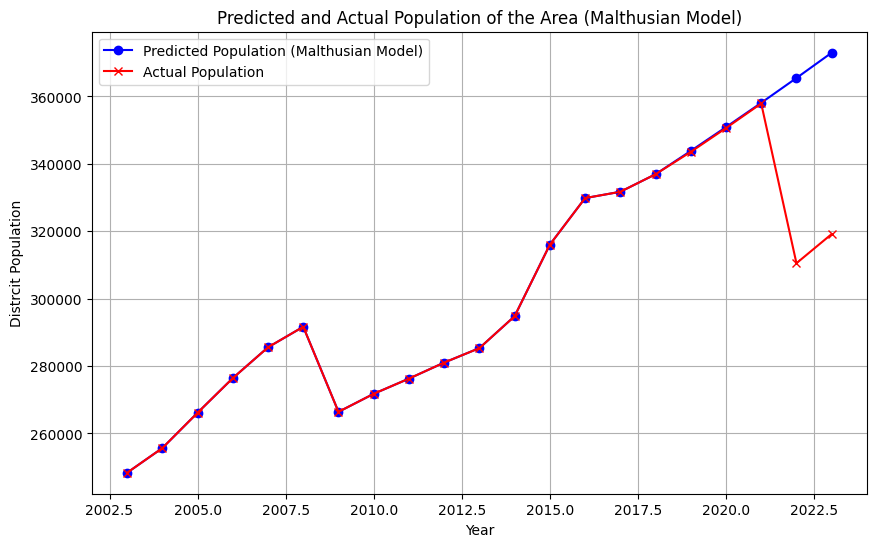

MSE: 1182445506.8788366
R2: -2.514639159134221


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
y_train = df[df.index.year <= 2018]['District Population']
y_test = df[df.index.year > 2018]['District Population']


def malthusian_model(P0, r, t):
    return P0 * np.exp(r * t)


P0 = y_train.iloc[0]
r_values = []

for i in range(1, len(y_train)):
    r = np.log(y_train.iloc[i] / y_train.iloc[i-1])
    r_values.append(r)

r_mean = np.mean(r_values)


years_test = np.arange(2019, 2024) - 2018
predicted_population_malthus = malthusian_model(y_train.iloc[-1], r_mean, years_test)


if len(y_test) == len(predicted_population_malthus):
    
    mse_malthus = mean_squared_error(y_test, predicted_population_malthus)
    r2_malthus = r2_score(y_test, predicted_population_malthus)

    
    years_full = np.arange(2003, 2024)
    population_full_malthus = np.concatenate((y_train.values, predicted_population_malthus))

    plt.figure(figsize=(10, 6))
    plt.plot(years_full, population_full_malthus, marker='o', linestyle='-', color='b', label='Predicted Population (Malthusian Model)')
    plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
    plt.xlabel('Year')
    plt.ylabel('Distrcit Population')
    plt.title('Predicted and Actual Population of the Area (Malthusian Model)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'MSE: {mse_malthus}')
    print(f'R2: {r2_malthus}')
else:
    print("Error: The sizes of the predicted and test datasets do not match.")


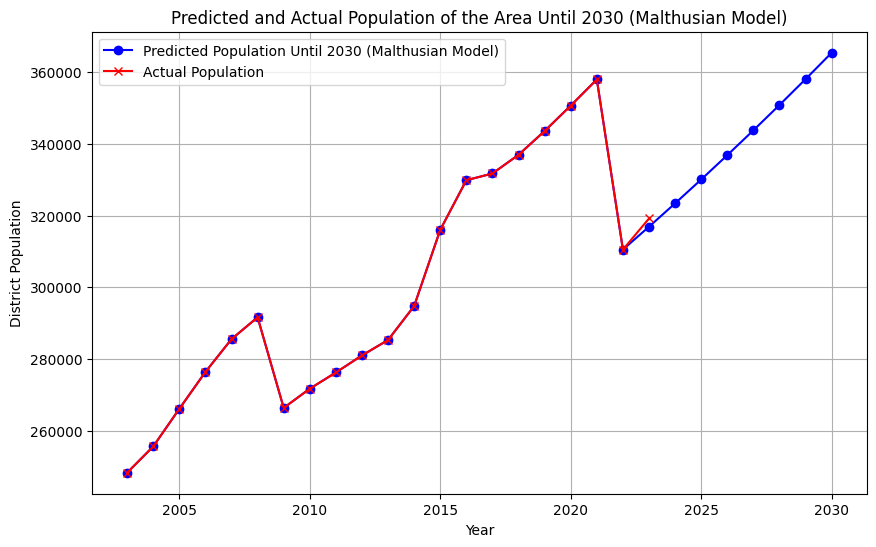

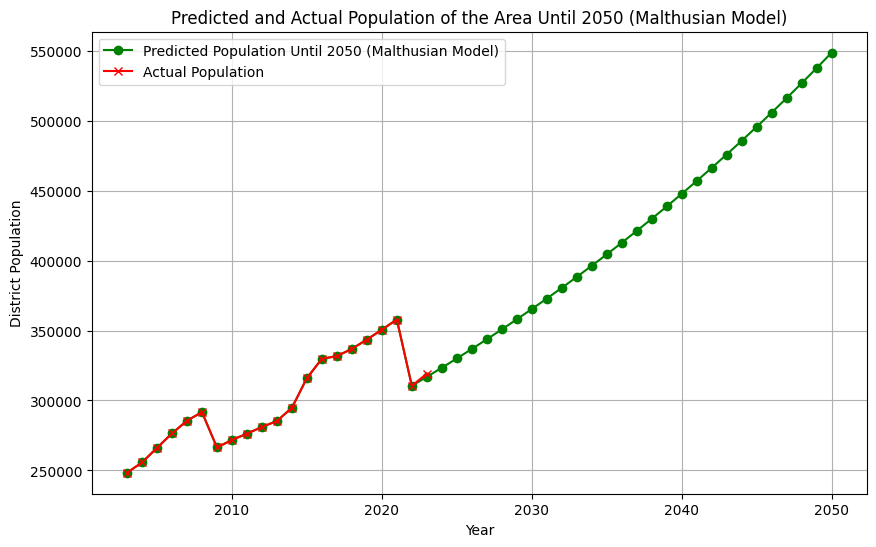

In [7]:
y_train_2030 = df[df.index.year <= 2022]['District Population']
y_test_2030 = df[df.index.year > 2022]['District Population']

years_2030 = np.arange(2023, 2031) - 2022
years_2050 = np.arange(2023, 2051) - 2022

predicted_population_malthus_2030 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2030)
predicted_population_malthus_2050 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2050)

years_full_2030 = np.arange(2003, 2031)
years_full_2050 = np.arange(2003, 2051)

population_full_malthus_2030 = np.concatenate((y_train_2030.values, predicted_population_malthus_2030))
population_full_malthus_2050 = np.concatenate((y_train_2030.values, predicted_population_malthus_2050))

# Chart Until 2030
plt.figure(figsize=(10, 6))
plt.plot(years_full_2030, population_full_malthus_2030, marker='o', linestyle='-', color='b', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the Area Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()
# Chart Until 2050
plt.figure(figsize=(10, 6))
plt.plot(years_full_2050, population_full_malthus_2050, marker='o', linestyle='-', color='g', label='Predicted Population Until 2050 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the Area Until 2050 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
forecast_years_2050 = np.arange(2023, 2051)
forecast_df_2050 = pd.DataFrame({
    'Year': forecast_years_2050,
    'Predicted District Population': predicted_population_malthus_2050
})

print("\nPredicted and Actual Population of the Area Until 2030 (Malthusian Model):")
print(forecast_df_2050)


Predicted and Actual Population of the Area Until 2030 (Malthusian Model):
    Year  Predicted District Population
0   2023                  316884.903201
1   2024                  323392.768871
2   2025                  330034.286586
3   2026                  336812.201160
4   2027                  343729.313774
5   2028                  350788.483139
6   2029                  357992.626675
7   2030                  365344.721715
8   2031                  372847.806741
9   2032                  380504.982634
10  2033                  388319.413958
11  2034                  396294.330269
12  2035                  404433.027446
13  2036                  412738.869058
14  2037                  421215.287749
15  2038                  429865.786663
16  2039                  438693.940884
17  2040                  447703.398919
18  2041                  456897.884206
19  2042                  466281.196650
20  2043                  475857.214193
21  2044                  485629.894421
22  

In [9]:
last_year = df.index.year[-1]
steps_2024 = 2024 - last_year
steps_2030 = 2030 - last_year
steps_2050 = 2050 - last_year

/home/agytai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


16:37:11 - cmdstanpy - INFO - Chain [1] start processing
16:37:12 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


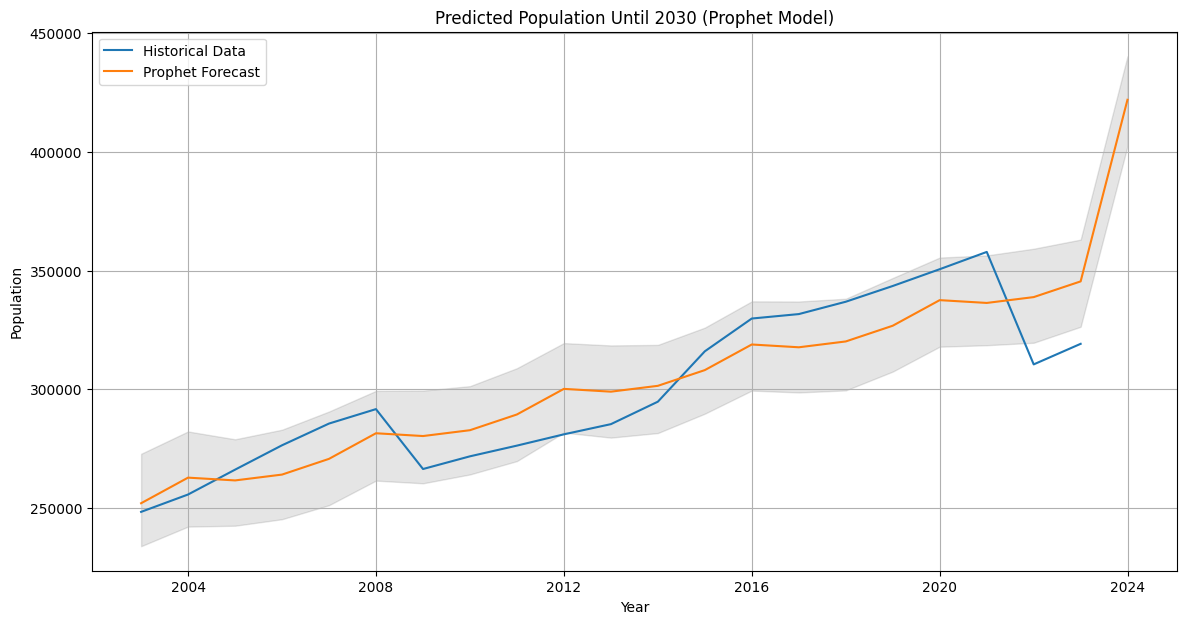

In [10]:
from prophet import Prophet
import matplotlib.pyplot as plt

df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})

model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2024, freq='Y')
forecast_prophet = model_prophet.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast Using the Prophet Model')
plt.legend()
plt.grid(True)
plt.show()


16:38:36 - cmdstanpy - INFO - Chain [1] start processing


16:38:36 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


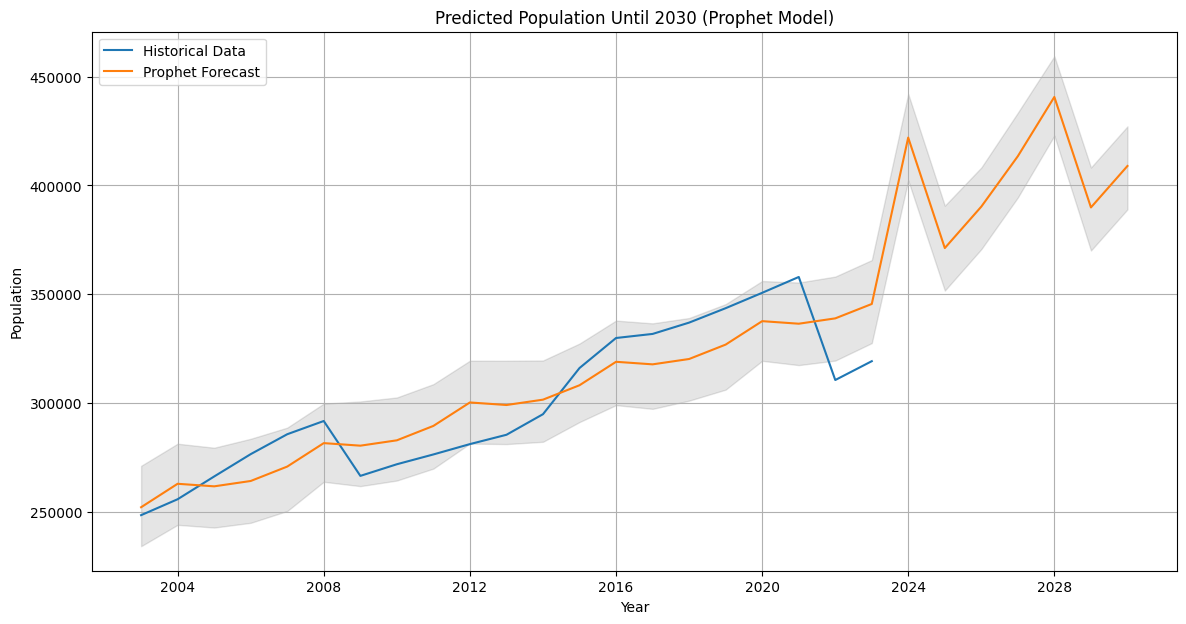

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})

model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2030, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Until 2030 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


16:39:39 - cmdstanpy - INFO - Chain [1] start processing


16:39:39 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


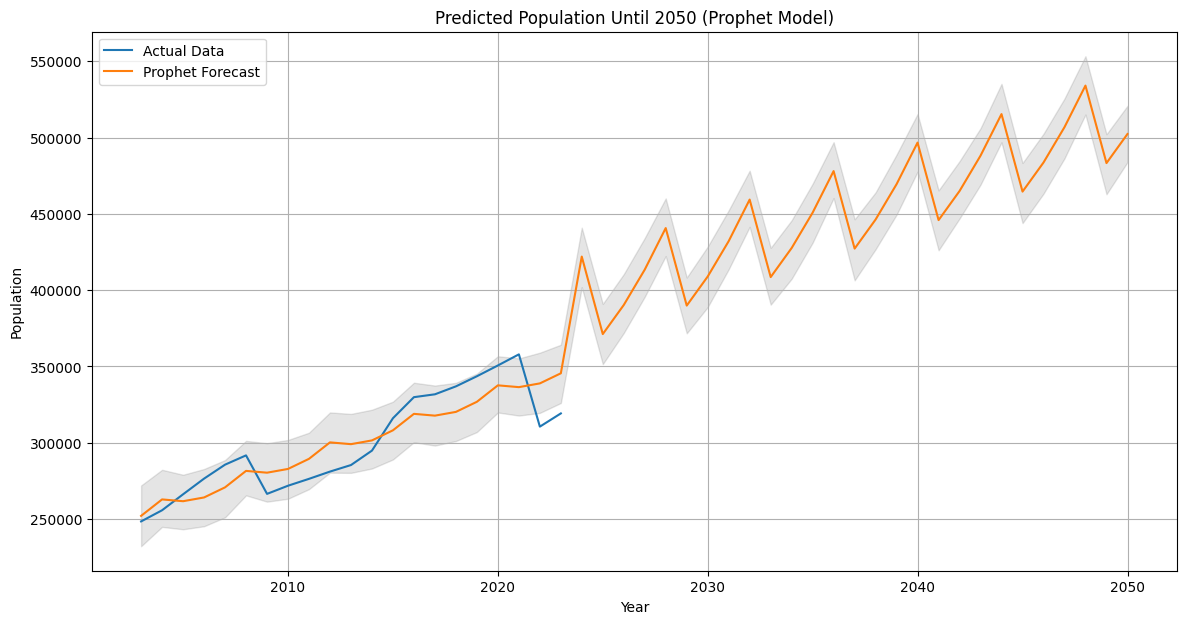

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})

model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2050, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Actual Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Until 2050 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:

forecast_df_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df_prophet = forecast_df_prophet.rename(columns={'ds': 'Year', 'yhat': 'Predicted Population', 'yhat_lower': 'Lower Bound', 'yhat_upper': 'Upper Bound'})


forecast_df_prophet = forecast_df_prophet[forecast_df_prophet['Year'].dt.year <= 2050]

forecast_df_prophet['Year'] = forecast_df_prophet['Year'].dt.year
forecast_df_prophet.set_index('Year', inplace=True)


print(forecast_df_prophet.head(30))  


      Predicted Population    Lower Bound    Upper Bound
Year                                                    
2003         252001.345026  232102.213938  271924.647697
2004         262787.223249  244772.200615  282219.343078
2005         261614.421400  243211.076756  278953.605263
2006         264076.258207  245200.430035  282729.353226
2007         270701.430236  251041.291685  288607.095259
2008         281487.308354  265436.817706  301156.181032
2009         280314.506401  261313.728894  299654.580495
2010         282776.343153  263228.010600  301764.138958
2011         289401.515142  269517.424836  306531.753681
2012         300187.393225  280318.277830  319820.529748
2013         299014.591259  280194.499564  318851.865863
2014         301476.427964  283051.036221  321607.459506
2015         308101.599906  288971.802032  326880.547549
2016         318887.477909  300278.517077  339303.514785
2017         317714.669295  298090.592353  337436.546717
2018         320176.499279  301

In [14]:
forecast_df_prophet

,Predicted Population,Lower Bound,Upper Bound
Year,,,
2003,252001.345026,232102.213938,271924.647697
2004,262787.223249,244772.200615,282219.343078
2005,261614.421400,243211.076756,278953.605263
2006,264076.258207,245200.430035,282729.353226
2007,270701.430236,251041.291685,288607.095259
2008,281487.308354,265436.817706,301156.181032
2009,280314.506401,261313.728894,299654.580495
2010,282776.343153,263228.010600,301764.138958
2011,289401.515142,269517.424836,306531.753681


In [15]:
forecast_df_2050

,Year,Predicted District Population
0,2023,316884.903201
1,2024,323392.768871
2,2025,330034.286586
3,2026,336812.201160
4,2027,343729.313774
5,2028,350788.483139
6,2029,357992.626675
7,2030,365344.721715
8,2031,372847.806741
9,2032,380504.982634


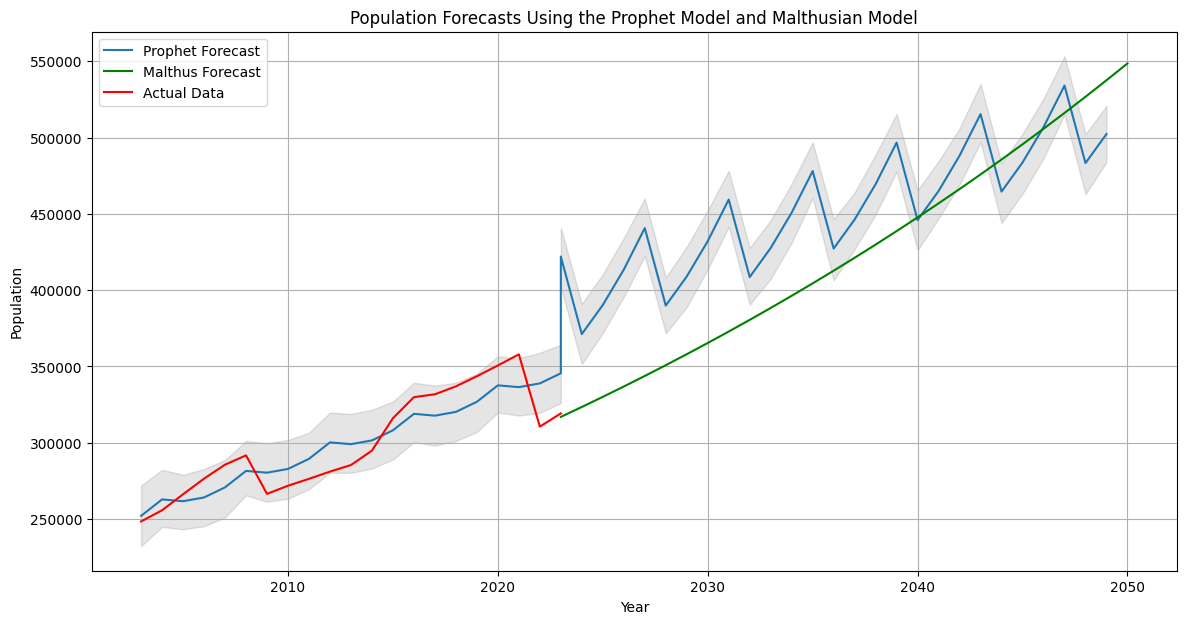

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(forecast_df_prophet.index, forecast_df_prophet['Predicted Population'], label='Prophet Forecast')
plt.fill_between(forecast_df_prophet.index, forecast_df_prophet['Lower Bound'], forecast_df_prophet['Upper Bound'], color='k', alpha=0.1)


plt.plot(forecast_df_2050['Year'], forecast_df_2050['Predicted District Population'], label='Malthus Forecast', color='green')
plt.plot(df.index.year, df['District Population'], label='Actual Data', color='red')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasts Using the Prophet Model and Malthusian Model')
plt.legend()
plt.grid(True)
plt.show()
